<a href="https://colab.research.google.com/github/Kepitition/Portfolio/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. KUTUPHANELERI EKLE**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

# **2. VERI INCELEMESI**

In [95]:
df = pd.read_csv('insurance.csv')

In [96]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Veri setinde 7 adet sutun bulunuyor. Bu sutunlarin bazilari asagidaki da gorulebilecegi gibi categorical bazilari da numeric degerlerden olusuyor. Ileri asamalarda modelleme yaparken bunlarin donusturulmesi onem arz edecektir.**

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [99]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Veri setinde bos veya 0 a karsilik gelen degerler bulunmuyor. Veri gorece temiz duruyor diyebiliriz. Fakat ilerleyen adimlarda outlier verilere dikkat edilmesi gerekebilir.**

# **3. DETAYLI VERI GORSELLESTIRME VE INCELEME**

## **3.1 BMI DAGILIMI**

30.66339686098655
30.4


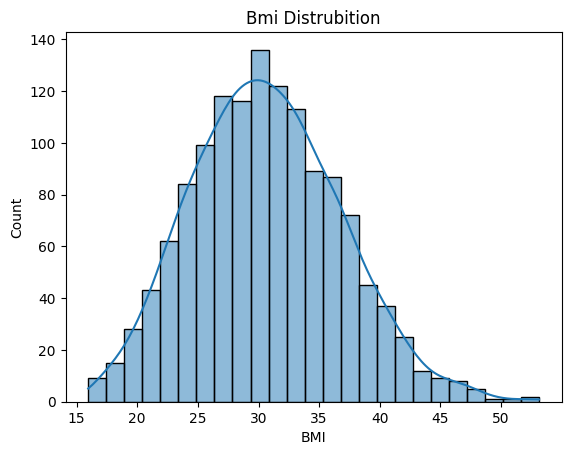

In [100]:
sns.histplot(data=df, x = 'bmi', kde = True)
plt.title('Bmi Distrubition')
plt.xlabel('BMI')
print(df.bmi.mean())
print(df.bmi.median())

**BMI degerlerinin ortalama degeri 30 olarak gozukuyor ve medyan degeri de ayni sekilde 30 bandinda seyrediyor. Dagilim istenilen duzeyde fakat outlier veriler olabilir diyebiliriz. Fakat ortalamaya etki edecek kadar yuksek sayida ve degerde olmadiklari yorumu da yapilabilir. Ileride daha net anlayacagiz.**

## **3.2 SMOKER VE CHARGES ARASINDAKI ILISKI INCELENMESI**

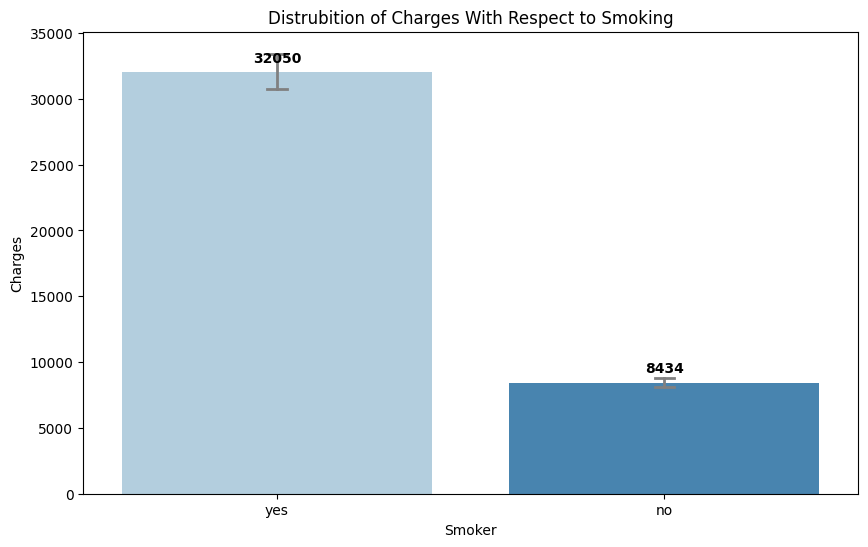

<Figure size 640x480 with 0 Axes>

In [101]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="smoker", y="charges", data=df, palette="Blues", capsize=0.05,errcolor = 'Gray',errwidth=2)
plt.title("Distrubition of Charges With Respect to Smoking")
plt.xlabel("Smoker")
plt.ylabel("Charges")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0,10),
                textcoords = 'offset points',
                fontweight='bold')

plt.show()
plt.clf()

**Sigara icme faktoru odenecek parada inanilmaz bir onem arz ediyor. Correlation table kullanarak bunlar daha da irdelenebilir.**

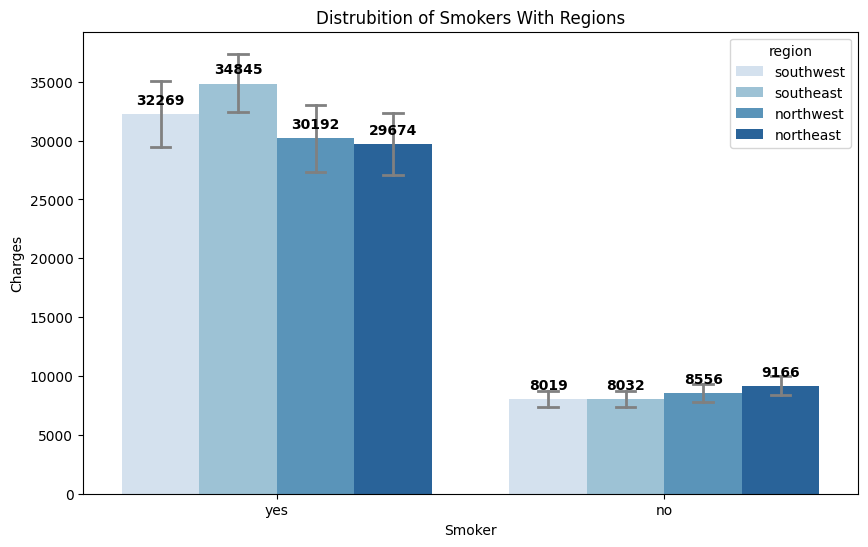

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="smoker", y="charges", hue="region", data=df, palette="Blues", capsize=0.05,errcolor = 'Gray',errwidth=2)
plt.title("Distrubition of Smokers With Regions")
plt.xlabel("Smoker")
plt.ylabel("Charges")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0,10),
                textcoords = 'offset points',
                fontweight='bold')

plt.show()
plt.clf()

**Yukaridaki grafiklerde sigara icmenin genel ve bolge bazinda karsilastirilmalarini yaptik peki her bolgeyi ayri ayri inceleyecek olursak nasil bir gorsel elde ederiz. Bunu gormek adina for dongusu icerisinde subplotlar olarak ayiralim.**

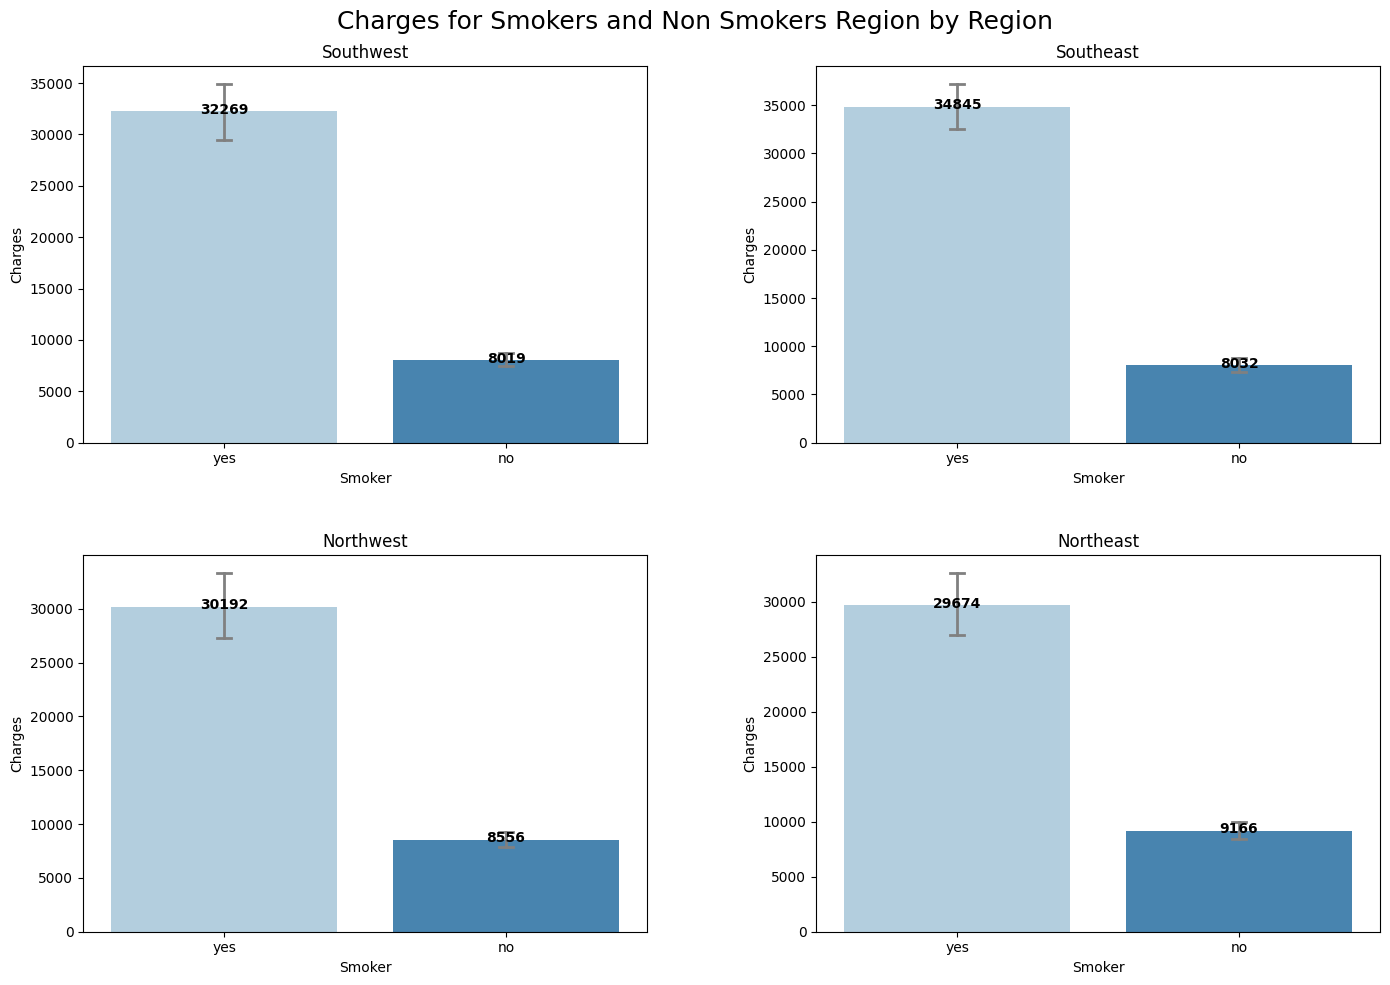

In [103]:
regions = df.region.unique()

fig1 = plt.figure(figsize=(14, 10))
for bolge, i in zip(regions, range(len(regions))):
    ax = plt.subplot(2, 2, i+1)
    sns.barplot(x="smoker", y=df.charges[df.region == bolge], data=df, palette="Blues", capsize=0.05,errcolor = 'Gray',errwidth=2)
    ax.set_xlabel('Smoker')
    ax.set_ylabel('Charges', rotation=90)
    ax.set_title(bolge.capitalize())

    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0,1),
                textcoords = 'offset points',
                fontweight='bold')

plt.suptitle('Charges for Smokers and Non Smokers Region by Region', fontsize=18)

# adjust lay out
plt.tight_layout()
plt.subplots_adjust(hspace=0.30,wspace = 0.30)

**Bolge bolge ayrica daha rahat bir gozlem yaptigimizda chargelar arasindaki farkin en az NORTHEAST bolgesinde oldugunu ve en cok farkin da SOUTHEAST tarafinda oldugunu gorebiliyoruz.**

## **3.3 SMOKER VE REGION ARASINDAKI BAGLANTI INCELENMESI**

Text(0.5, 1.0, 'Relationship Between Smoker and Region')

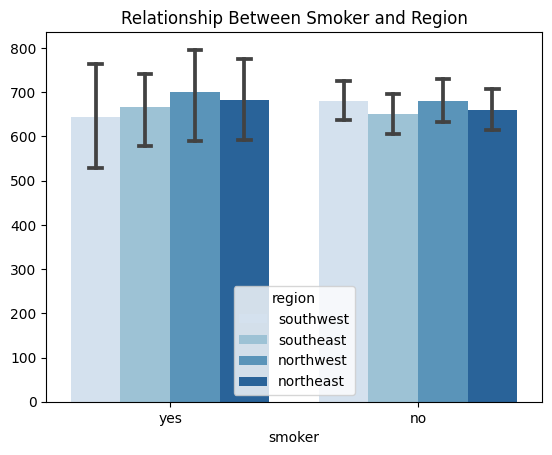

In [104]:
sns.barplot(x = "smoker", y=df["region"].index, hue = 'region',data = df,palette ='Blues',capsize = 0.05).set_title("Relationship Between Smoker and Region")

**Charges grafikleri icin barplot kullanmistik. Simdi kiyaslama icin sadece iki degiskenimiz oldugunu dusunerek pie chart yontemini de hatirlamak amacli buradaki karsilastirmalari pie chart olarak yapmayi dogru buldum.**

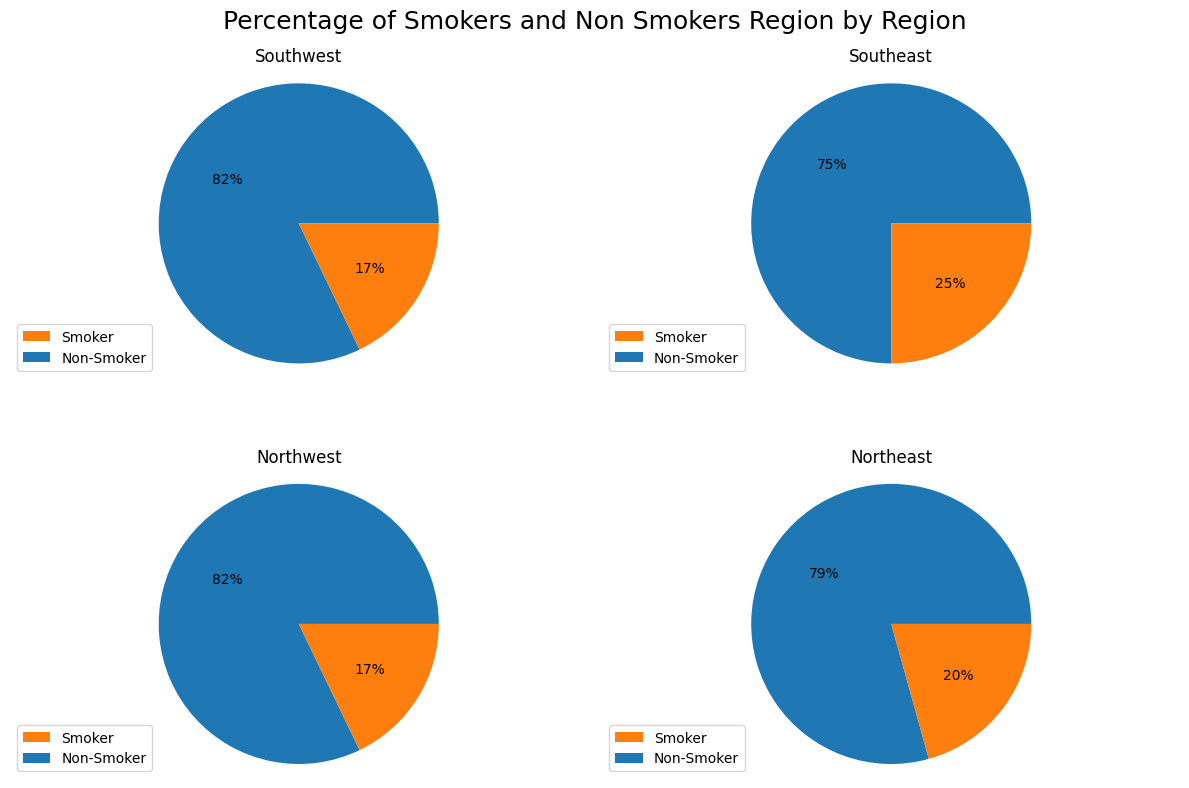

In [105]:
fig2 = plt.figure(figsize = (12,8))
smoker_table = ['Non-Smoker','Smoker']
for bolge, i in zip(regions, range(len(regions))):
    ax = plt.subplot(2, 2, i+1)
    plt.pie(df.smoker[df.region == bolge].value_counts(), autopct="%1d%%")
    plt.legend(smoker_table,reverse=True,loc =3)
    ax.set_title(bolge.capitalize())
    plt.axis('equal')


plt.suptitle('Percentage of Smokers and Non Smokers Region by Region', fontsize=18)

# adjust lay out
plt.tight_layout()
plt.subplots_adjust(hspace=0.30)

## **3.4 BMI VE CINSIYET ARASINDAKI BAGLANTI INCELENMESI**

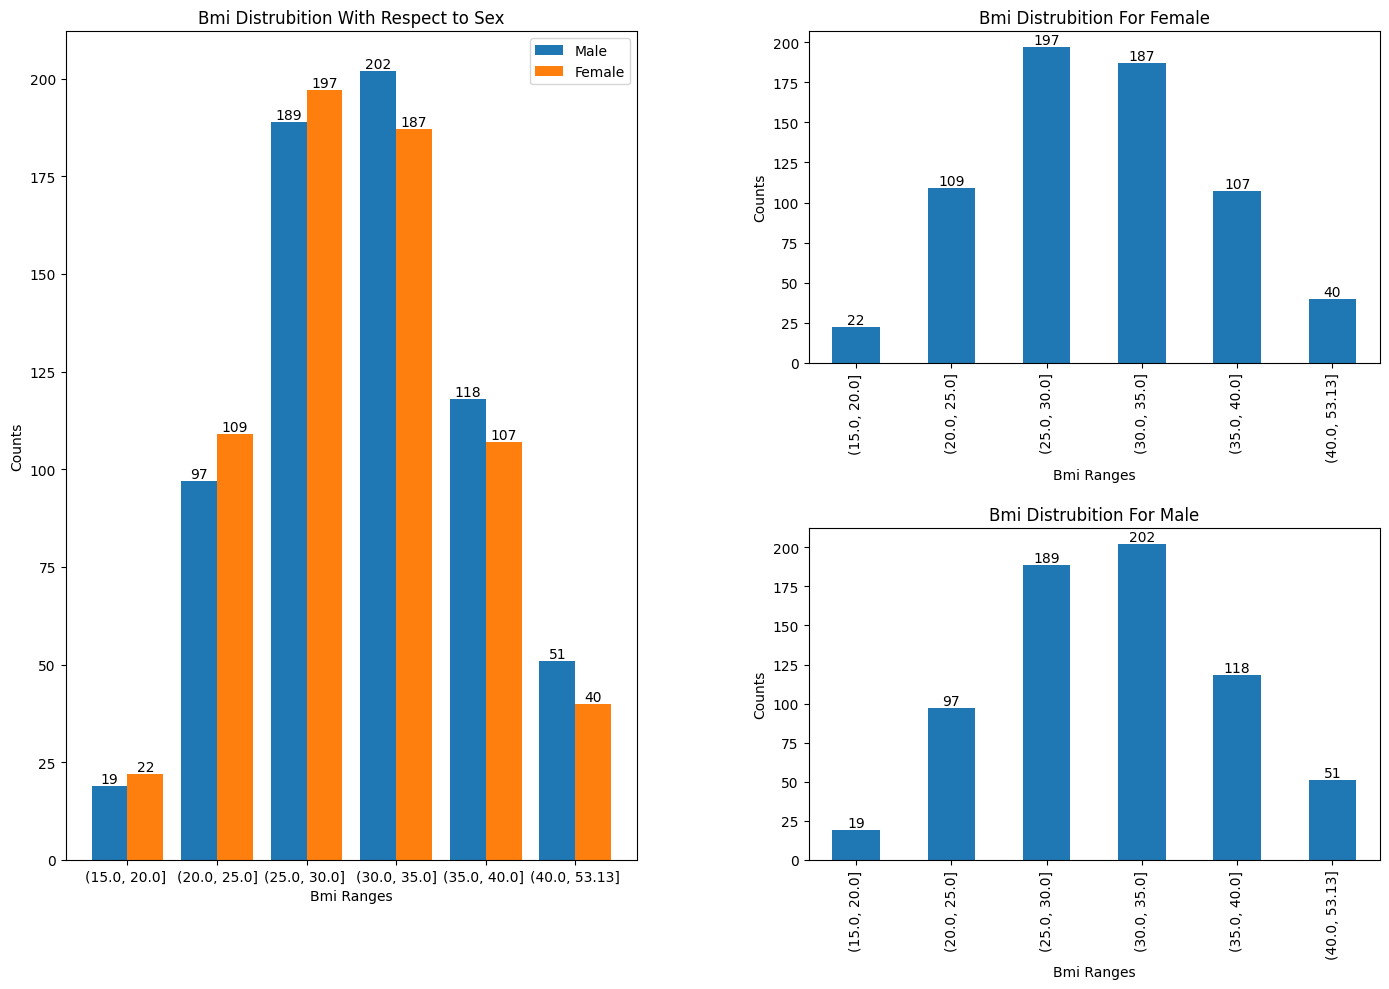

In [106]:
bmi_bin = [15, 20, 25, 30, 35, 40, df['bmi'].max()]
fig3 = plt.figure(figsize = (14,10))
plt.subplot(2,2,4)
plt.title('Bmi Distrubition For Male')
plt.xlabel('Bmi Ranges')
plt.ylabel('Counts')
df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bin)
bmi_male= df['bmi_group'][df.sex == 'male'].value_counts().sort_index()
bmi_male.plot(kind='bar')
for index, value in enumerate(bmi_male):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.subplot(2,2,2)
plt.title('Bmi Distrubition For Female')
plt.xlabel('Bmi Ranges')
plt.ylabel('Counts')
bmi_female= df['bmi_group'][df.sex == 'female'].value_counts().sort_index()
bmi_female.plot(kind='bar')

for index, value in enumerate(bmi_female):
    plt.text(index, value, str(value), ha='center', va='bottom')




bmi_range = ['(15.0, 20.0] ', '(20.0, 25.0]', '(25.0, 30.0] ', '(30.0, 35.0]', '(35.0, 40.0] ','(40.0, 53.13]']

bmi_m = [19, 97, 189, 202, 118,51]
bmi_f = [22, 109, 197, 187, 107,40]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

bmi_males = create_x(2,0.8,1,6)
bmi_females = create_x(2,0.8,2,6)

ax = plt.subplot(1,2,1)
plt.bar(bmi_males, bmi_m)
plt.bar(bmi_females, bmi_f)

middle_x = [ (a + b) / 2.0 for a, b in zip(bmi_males,bmi_females)]
ax.set_xticks(middle_x)
ax.set_xticklabels(bmi_range)

plt.legend(["Male", "Female"])
plt.title('Bmi Distrubition With Respect to Sex')
plt.xlabel('Bmi Ranges')
plt.ylabel('Counts')
for index, value in enumerate(bmi_male):
    plt.text(index * 2 + 0.8, value, str(value), ha='center', va='bottom')

for index, value in enumerate(bmi_female):
    plt.text(index * 2 + 1.6, value, str(value), ha='center', va='bottom')


plt.tight_layout()
plt.subplots_adjust(hspace=0.50,wspace = 0.30)

**Grafiklerden de anlasilacagi uzere soyleyebiliriz ki yuksek kabul edilen bmi degerlerinde (yani 30 ve ustu diyebilecegimiz bmi degerleri) erkekler kadinlardan bu dataseti icerisinde daha fazladir.**

## **3.5 BOLGE VE COCUK SAYISI ARASINDAKI BAGLANTI INCELENMESI**

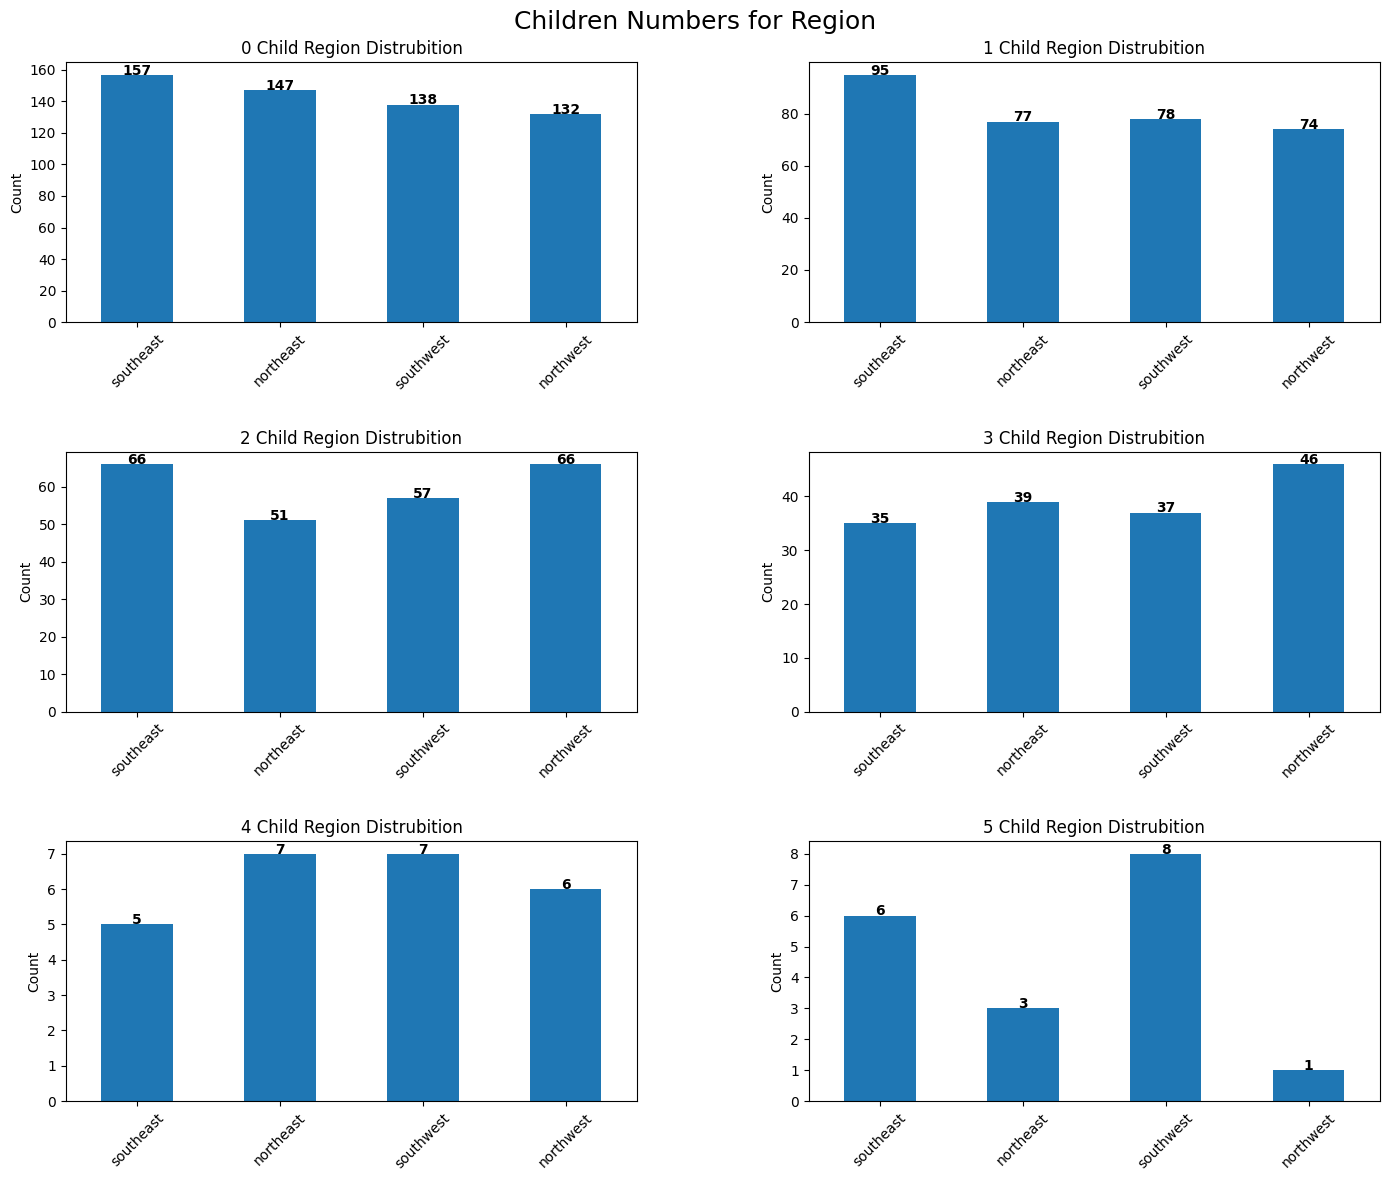

In [107]:
fig4 = plt.figure(figsize = (14,12))
children_unique = (sorted(df.children.unique()))
southeast_total_child = 0
northeast_total_child = 0
southwest_total_child = 0
northwest_total_child = 0
for child in children_unique:
  ax = plt.subplot(3,2,child+1)
  child_group = df[df['children'] == child]
  child_by_region = child_group['region'].value_counts()
  southeast_total_child += child_by_region['southeast'] * child
  northeast_total_child += child_by_region['northeast'] * child
  southwest_total_child += child_by_region['southwest'] * child
  northwest_total_child += child_by_region['northwest'] * child

  region_order = ["southeast", "northeast", "southwest", "northwest"]
  child_by_region = child_by_region.reindex(region_order)
  child_by_region.plot(kind='bar')
  plt.title(f'{child} Child Region Distrubition')
  plt.xticks(rotation=45)
  plt.ylabel('Count')
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0,3),
                textcoords = 'offset points',
                fontweight='bold')

plt.suptitle('Children Numbers for Region', fontsize=18)


plt.tight_layout()
plt.subplots_adjust(hspace=0.50,wspace = 0.30)


**Her cocuk varyantina gore bolgeleri siniflandirmis olduk. Kod icerisinde ciktisini almamama ragmen toplam cocuk sayilarini da kaydettik. Simdi asagida projede bahsedilen cocuk sayilarini da gorelim.**

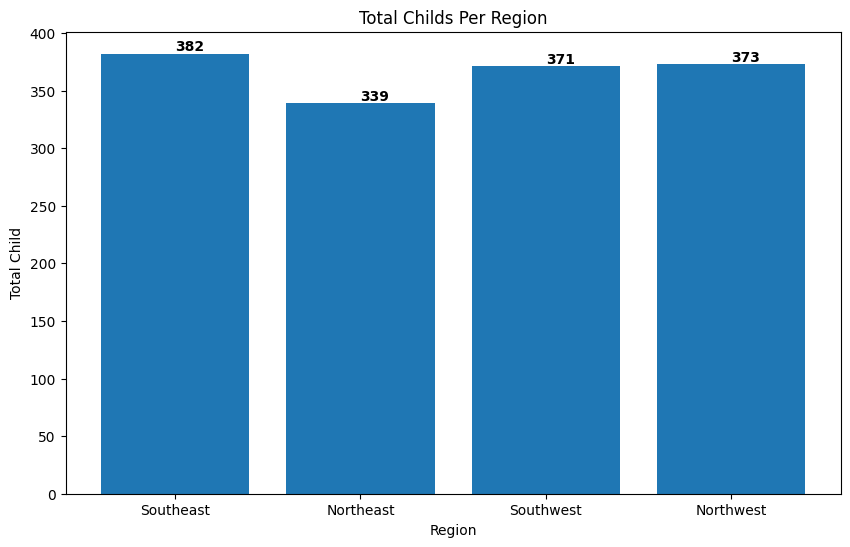

In [108]:
bmi_range = ['Southeast', 'Northeast', 'Southwest', 'Northwest']
child_values = [southeast_total_child, northeast_total_child, southwest_total_child, northwest_total_child]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(bmi_range, child_values)

# Sütunların üstüne değerleri eklemek için loop
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom',fontweight='bold')

plt.xlabel('Region')
plt.ylabel('Total Child')
plt.title('Total Childs Per Region')
plt.show()

**Burada goruldugu uzere en cok cocuk sahibi olan bolge 'Southeast' bolgesi olarak gorulmektedir.**

## **3.6 YAS VE BMI ARASINDAKI BAGLANTI INCELENMESI**

**Yas ve BMI arasindaki baglantiyi incelemek icin kullanilabilecek en mantikli plotlardan birinin boxplot olduguna karar verdim. Cunku bu veri setinde her yastan BMI degerlerine bakarsak lineplot aradaki errorleri her ne kadar gosterebilsek de outlier verilerin cikma ihtimaline karsi boxplot her zaman daha guzel bir gorsel sunacaktir. (Gerektigi takdirde scatter da kullilabilir)**

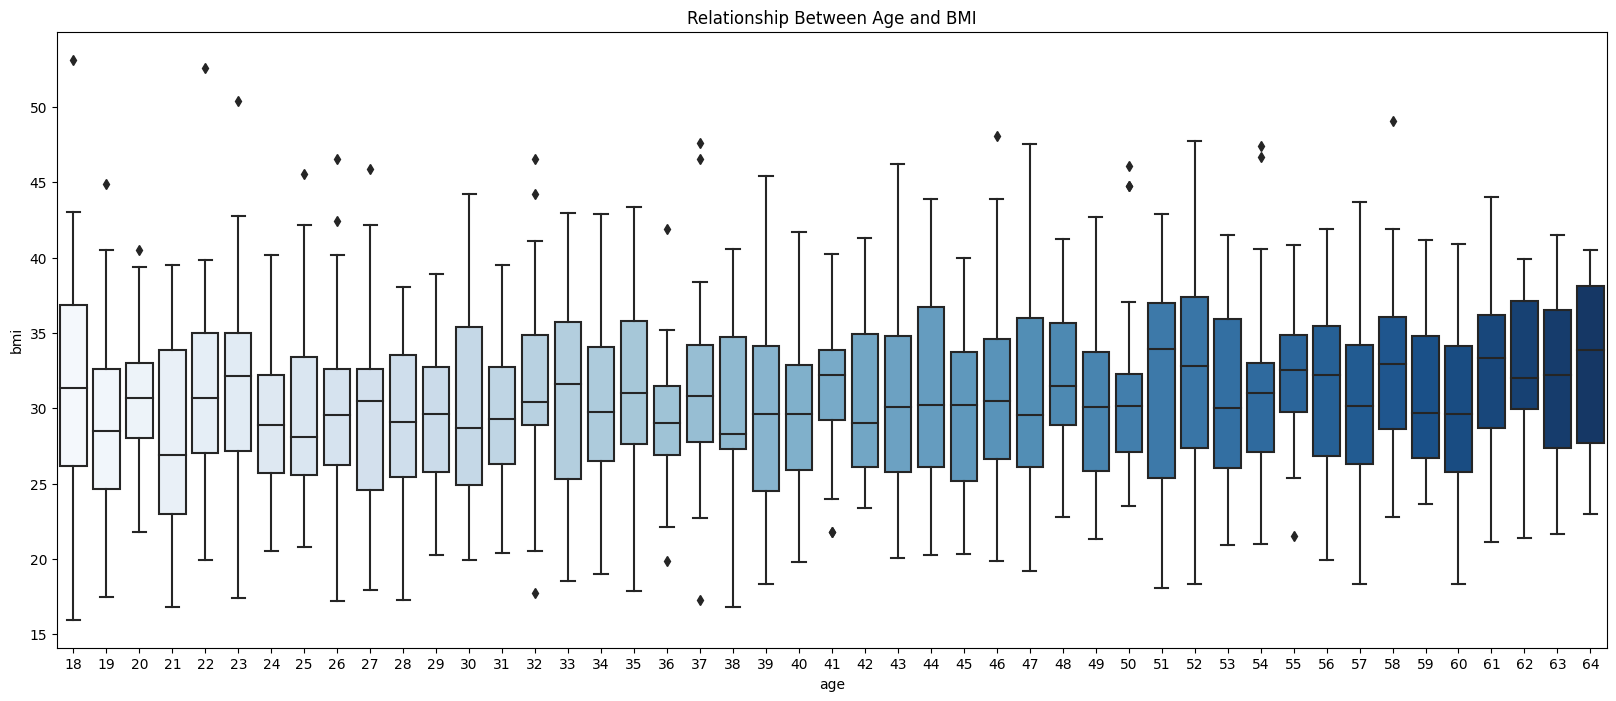

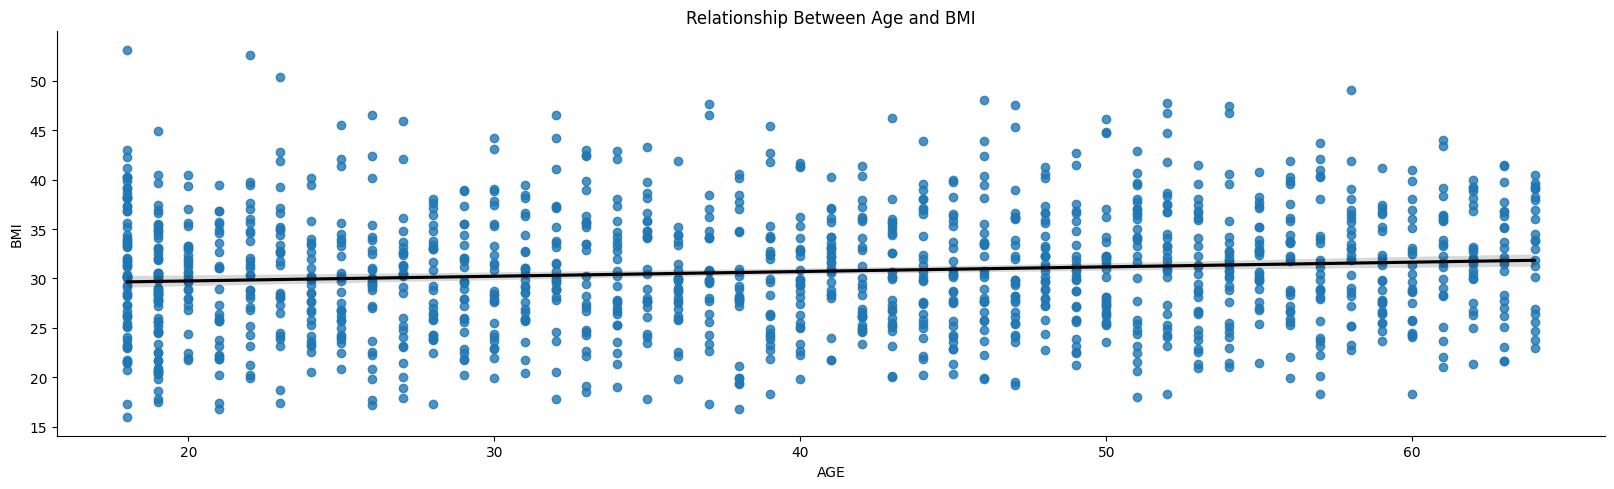

In [109]:
plt.figure(figsize = (20,8))
plt.title('Relationship Between Age and BMI')
plt.xlabel('AGE')
plt.ylabel('BMI')
sns.boxplot(x='age', y="bmi", data=df,palette = 'Blues')
sns.lmplot(x='age', y="bmi", data=df,line_kws={'color': 'black'},height = 5, aspect = 3.25)
plt.title('Relationship Between Age and BMI')
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.tight_layout()

**Grafikler incelendiginde goruluyor ki yaslarda spesifik bir ortalama yakalamak biraz zor fakat cok belirgin (18 yas grubu gibi) outlierlar arada cikabiliyor. Bunun disinda lmplot incelendiginde baslangic ve bitis cizgilerinin egrisine bakarak soyleyebiliriz ki yas ilerledikce BMI degerleri cok az bir oranla da olsa artis gostermis.**

## **3.7 BMI VE COCUK SAYISI ARASINDAKI BAGLANTI INCELENMESI**

<Axes: title={'center': 'Relationship Between Children Number and BMI'}, xlabel='children', ylabel='bmi'>

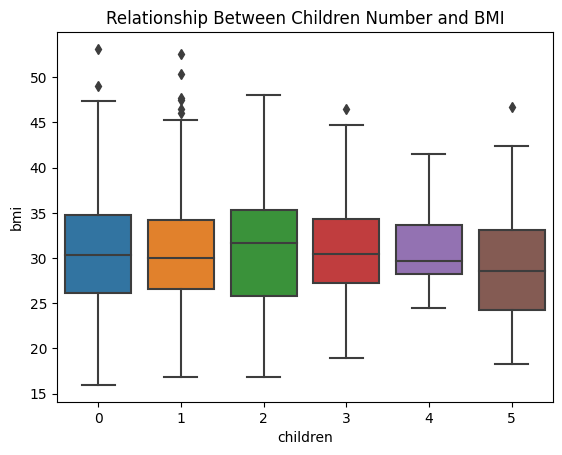

In [111]:
plt.title('Relationship Between Children Number and BMI')
plt.xlabel('Children')
plt.ylabel('BMI')
sns.boxplot(x="children", y="bmi", data=df)

**Grafikler incelendigi takdirde bmi degerleri ortalamasi en cok 2 cocuklu kisilerde goruluyor. En stabil veriler ise 4 cocuklu kisilerde toplanmis. Tabi bunun boyle olmasinin sebebi 4 cocuga sahip verilerin gorece az olmasindan kaynaklaniyor diyebiliriz**

## **3.8 BMI OUTLIER VERILERIN INCELENMESI**

**Verilen projedeki soruda sadece BMI outlier verilerinin incelenmesi istendigi icin bu konu ozelinde daha detaya girebilecegimi dusundum. Dolayisi ile outlier detection kismi 3 farkli alt basliga kendi icerisinde ayrilacaktir. Bunlar 3.8.1 etc diye isimlendirilecektir.**

### **3.8.1 IQR (Interquartile Range Method)**

IQR aslinda bir boxplot methodu da denebilir. IQR dedigimiz tanimlama ise datanin birinci ve ucuncu quartile degerlerinin farklari seklinde isimlendirilebilir. Dikkat edilmesi gereken degerler ilk quartilein IQR*1.5 degerinden cikarilmasi ile elde edilen sonuclar ve ucuncu quartile in IQR*1.5 ile toplanmasi ile elde edilen sonuclar olacaktir. Bahsedilen degerlerin sirasiyla alti ve ustu olan degerler outlier olarak kabul edilir.


Isleme doktugumuzde daha anlasilir olacaktir. Dolayisi ile asagida once islemi sonrasinda gorsellestirmesi uzerinde duralim.

In [112]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)

IQR = Q3 - Q1

cut_off = IQR * 1.5 #Yukaridaki aciklamada bahsettigimiz IQR * 1.5 degeri ayni zamanda cut_off degeri olarak da bahsedilebilir.

lower_outlier = Q1 - cut_off
upper_outlier = Q3 + cut_off

print('The IQR is',IQR)
print('The lower outlier values starts from', lower_outlier)
print('The upper outlier values starts from', upper_outlier)

df_lower = df[df['bmi'] < lower_outlier]
df_upper = df[df['bmi'] > upper_outlier]
print(df_lower.shape[0])
print(df_upper.shape[0])

The IQR is 8.3975
The lower outlier values starts from 13.7
The upper outlier values starts from 47.290000000000006
0
9


**Outlier verileri buldugumuza gore simdi gorsellestirip daha iyi bakalim.**

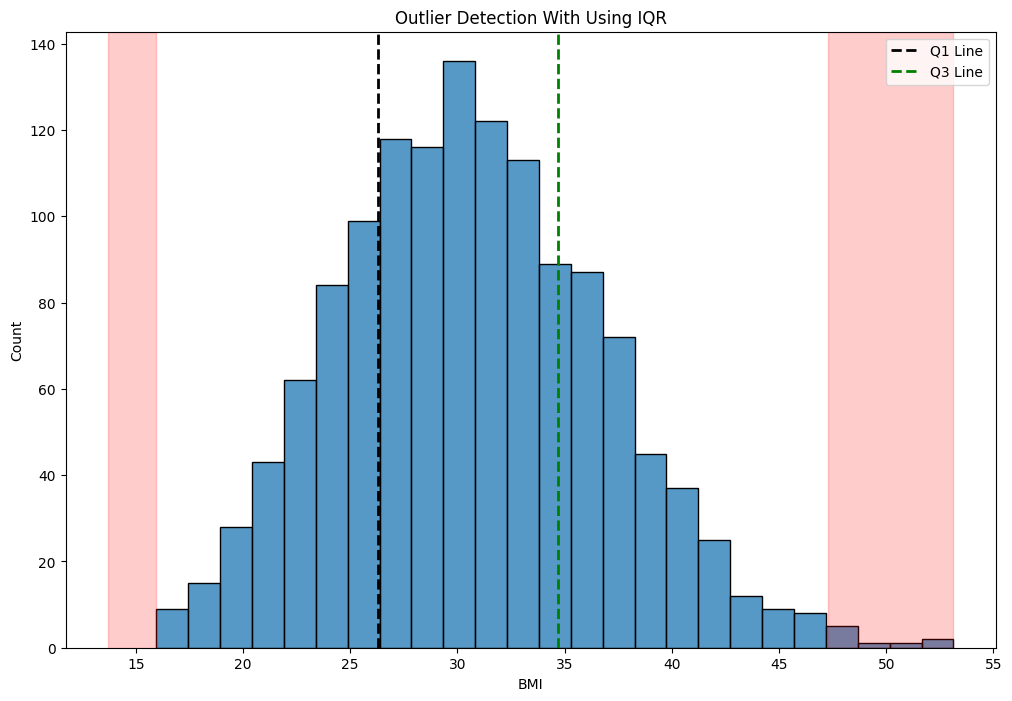

In [113]:
plt.figure(figsize = (12,8))
plt.title('Outlier Detection With Using IQR')
plt.xlabel('BMI')
plt.ylabel('Count')
sns.histplot(df.bmi, kde=False)
plt.axvline(x = Q1, color = 'black', label = 'Q1 Line',linestyle = '--',linewidth = 2)
plt.axvline(x = Q3, color = 'green', label = 'Q3 Line',linestyle = '--',linewidth = 2)
plt.legend()
plt.axvspan(xmin = lower_outlier,xmax= df.bmi.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper_outlier,xmax= df.bmi.max(),alpha=0.2, color='red')

**Artik grafikten de yorumlayabilecegimiz uzere underlier olarak nitelendirdigimiz yani cok dusuk degerlerde bir outlier veriyle karsilasamiyoruz. Fakat BMI degerleri fazlasiyla yuksek degerlerle karsilasabiliyoruz. Fakat bence datanin incelenmesinde bunlarin cikartilmamasi gerekiyor. Cunku gercek hayatta da karsilasilabilir ve mean degerlerini ne kadar degistirecegine de bakmak gerekir. Bir sonraki adimda da bu degerlerin mean ve median degerlerini nasil degistirdiginiz gorelim.**

In [114]:
df = pd.read_csv('insurance.csv')
print(f'Mean of BMI before excluding outlier values : {df.bmi.mean()}')
print(f'Median of BMI before excluding outlier values : {df.bmi.median()}')
print('-'*100)
df = df[df['bmi'] < upper_outlier]
print(f'Mean of BMI after excluding outlier values : {df.bmi.mean()}')
print(f'Median of BMI after excluding outlier values : {df.bmi.median()}')

Mean of BMI before excluding outlier values : 30.66339686098655
Median of BMI before excluding outlier values : 30.4
----------------------------------------------------------------------------------------------------
Mean of BMI after excluding outlier values : 30.53734762979684
Median of BMI after excluding outlier values : 30.3


**Mean ve median degerlerinin inanilmaz bir degisime ugramamasinin sebebi outlier olarak nitelendirilen degerlerin az sayida olmasi ve onem katsayilarinin (kutlelerinin belki) normalde karsilastigimiz outlier verilerine oranla kucuk kalmasi diyebiliriz bence.**

**Sonucta hepimiz agir yasamlar izlemeyi seviyoruz degil mi :)**

### **3.8.2 STD (Standard Deviation Method)**

Standard deviation aslinda istatistikteki ile ayni olarak isleniyor. Kisaca bahsedecek olursak datalarin mean valuedan ne kadar yayildigini anlatiyor diyebiliriz. Dikkat etmemiz gereken konu datanin mean valuedan yuzde 68-70 oraninda yayilmanin kabul edildigi olacaktir. Bunun disinda %95 ve % 97.5 kisimlari da son kabul edilebilir outlier olmayan veriler olarak nitelendirilebilir. IQR'da yaptigimiz gibi once degerleri bulalim sonra grafik ustunden inceleyelim.

In [115]:
mean_val = df.bmi.mean()
std_val = df.bmi.std()

cutoff = std_val * 3 #third std value in other names

lower_std = mean_val - cutoff
upper_std = mean_val + cutoff

print('Lower last non-outlier value is ' , lower_std)
print('Upper last non-outlier value is ', upper_std)

df_lower_std = df[df['bmi'] < lower_std]
df_upper_std = df[df['bmi'] > upper_std]
print('Total number of outliers: ', (df_lower_std.shape[0]+df_upper_std.shape[0]))

Lower last non-outlier value is  12.777508324427927
Upper last non-outlier value is  48.297186935165755
Total number of outliers:  0


**Goruldugu uzere IQR dan farkli olarak bu sefer 4 tane outlier veri oldugunu bulduk. Bu yuzden outlier bulurken gozle incelemenin yaninda farkli metotlar deneyip sonuclari karsilastirmak daha saglikli olacaktir. Simdi gorsellestirmeyi de yapip devam edelim.**

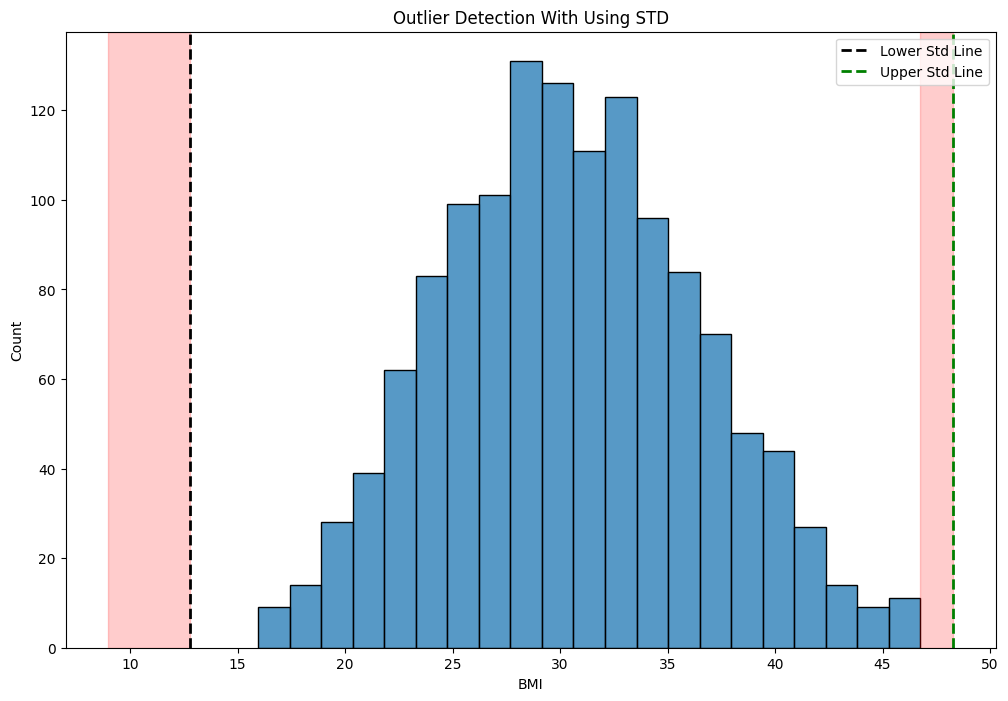

In [116]:
plt.figure(figsize = (12,8))
plt.title('Outlier Detection With Using STD')
plt.xlabel('BMI')
plt.ylabel('Count')
sns.histplot(df.bmi, kde=False)
plt.axvline(x = lower_std, color = 'black', label = 'Lower Std Line',linestyle = '--',linewidth = 2)
plt.axvline(x = upper_std, color = 'green', label = 'Upper Std Line',linestyle = '--',linewidth = 2)
plt.legend()
plt.axvspan(xmin = lower_std,xmax= df.bmi.min()-7,alpha=0.2, color='red')
plt.axvspan(xmin = upper_std,xmax= df.bmi.max(),alpha=0.2, color='red')

**Grafigi inceledigimizde IQR daki gibi outlier verilerin yine cok dusuk kisimda degil de yuksek BMI degerlerinde oldugunu goruyoruz.**

### **3.8.3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Bu adimda derste de bahsettigimiz DBSCAN algoritmasina da deyinmek istedim. Bu baglamda DBSCAN icin sadece BMI degerlerini incelemek mumkun degil cunku DBSCAN aslinda bir clustering yontemi. Bu yuzden yas ve BMI degerleri arasindaki baglantiyi da kullanarak incelememizi yapabiliriz. Zaten bundan bir onceki maddede de gordugumuz boxplottaki gibi belirli yaslarda goze carpan outlier veriler vardi.

In [117]:
#TEORIK OLDUGU ICIN VE SONRADAN FOR DONGUSU ILE DAHA GUZEL BIR COZUM YAPILDIGI ICIN BURALAR COMMENTLENMISTIR
# X_dbscan1 = df[['age','bmi']].values
# db1 = DBSCAN(eps=3.0, min_samples=10).fit(X_dbscan1)
# labels1 = db1.labels_
# pd.Series(labels1).value_counts()

**DBSCAN algoritmasini inceledigimizde (ki ben de projeye calisirken ogrendim :D) ilk bakista ne oldugunu bilmeyen veya daha once DBSCAN kullanmamais biri icin fazlaca anlamsiz geliyor olabilir. Simdi burada DBSCAN in nasil calistigini ve girdi olarak verdigimiz 'eps' ve 'min_samples' parametrelerinin ne ifade ettiginden bahsedelim.**

**DBSCAN temelde bahsetmis oldugumuz gibi bir kumeleme yani clustering algortimasidir. verilerin yogunluguna bagli olarak gruplara ayirmak icin kullanilir. Dipnot: gurultuye (Noise) olan dayanikliligi ile bilinir.**

**Parametrelere gelecek olursak onlari madde madde anlatmak daha saglikli olacaktir.**


*   **'eps' : Bu parametre secilen bir veri noktasinin komsuluk yaricapini yani etrafindakileri kapsadigi cemberin yaricapini temsil eder. Eger sectigimiz yaricapindan kucuk bir alanda bir nokta bulunursa bu nokta ayni kume icerisinde kabul edilir.**
*  ** 'min_samples' : Tabii ki yukarida bahsettigimiz 'eps' icin secilen noktalar rastgele secilmiyor. Cunku yanlislikla bir outlier veri secilse ve onun yaricapinda bir deger bulunamasa tek basina bir kume olmasi buyuk bir problem doguracaktir. Bu kisimda 'min_samples' parametresi yardima kosuyor. Kisaca bir noktanin cekirdek (core) nokta olup olmamasinin bulunmasinda yardimci oluyor diyebiliriz. Bunu da secilen bir noktanin minimum komsu noktalarina bakarak yapiyor. Yani secmis oldugumuz noktanin belirlenen yaricapta kac tane noktayi daha icine dahil edecegi burada belirleniyor.**


**Simdi verimizdeki outlier degerlerini bu parametreleri daha iyi anlamak amaciyla farkli parametre degerleri koyarak inceleyelim.**






Text(0.5, 0.98, 'Different Parameters For eps and min_samples')

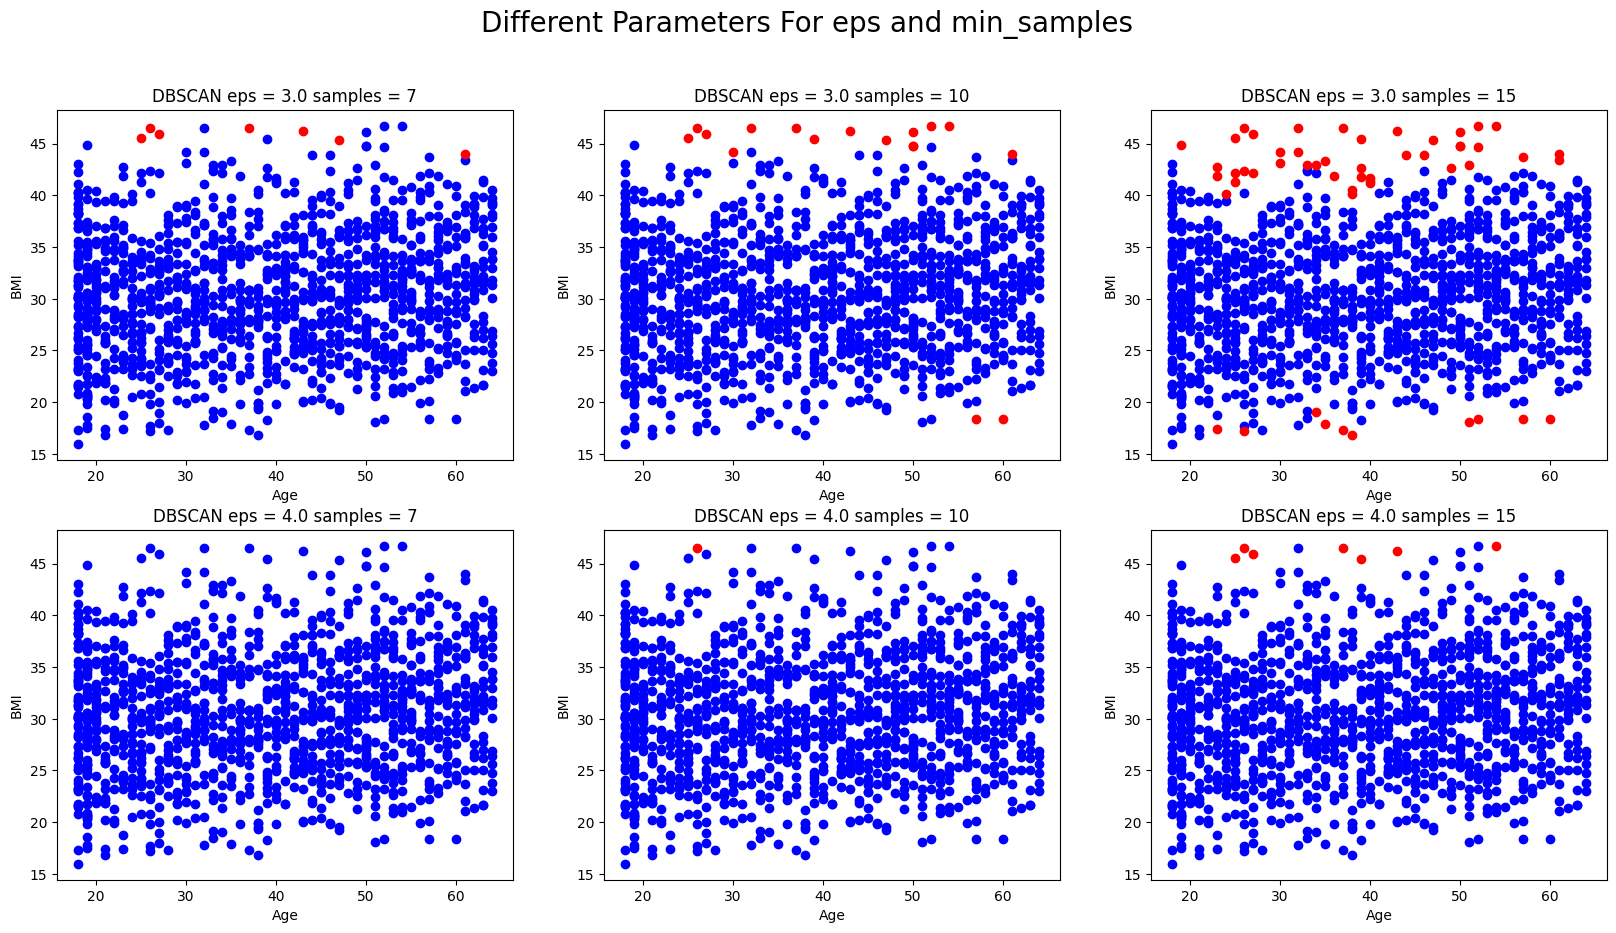

In [120]:
plt.figure(figsize=(20,10))

colors = ['blue', 'red']

metrics_eps = [3.0,3.0,3.0,4.0,4.0,4.0]
samples_mins = [7,10,15,7,10,15]
for eps,sample,i in zip(metrics_eps,samples_mins,range(0,6)):
  plt.subplot(2,3,i+1)
  X_dbscan = df[['age','bmi']].values
  db = DBSCAN(eps=eps, min_samples=sample).fit(X_dbscan)
  labels = db.labels_
  unique_labels = set(labels)
  for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X_dbscan[:,0][sample_mask], X_dbscan[:, 1][sample_mask], 'o', color=color);
  plt.title(f'DBSCAN eps = {eps} samples = {sample}')
  plt.xlabel('Age');
  plt.ylabel('BMI');
plt.suptitle('Different Parameters For eps and min_samples',fontsize = 20)

*   **Grafikleri inceledigimizde anlattigimiz parametreler daha fazla anlam kazandi. Bu baglamda baktigimizda yaricap arttikca outlier olarak kabul ettigimiz verilen azaldigini gorebiliriz.**
*   Sample sayilarana bakarsak sample sayisi arttikca yani kisaca bir alanin icerisinde gerekli olan minimum nokta sayisi arttikca outlier verilerin arttigini yani istenen nokta sayisinin karsilanamayacagini goruyoruz.

## **3.9 BMI VE CHARGES ARASINDAKI BAGLANTI INCELENMESI**

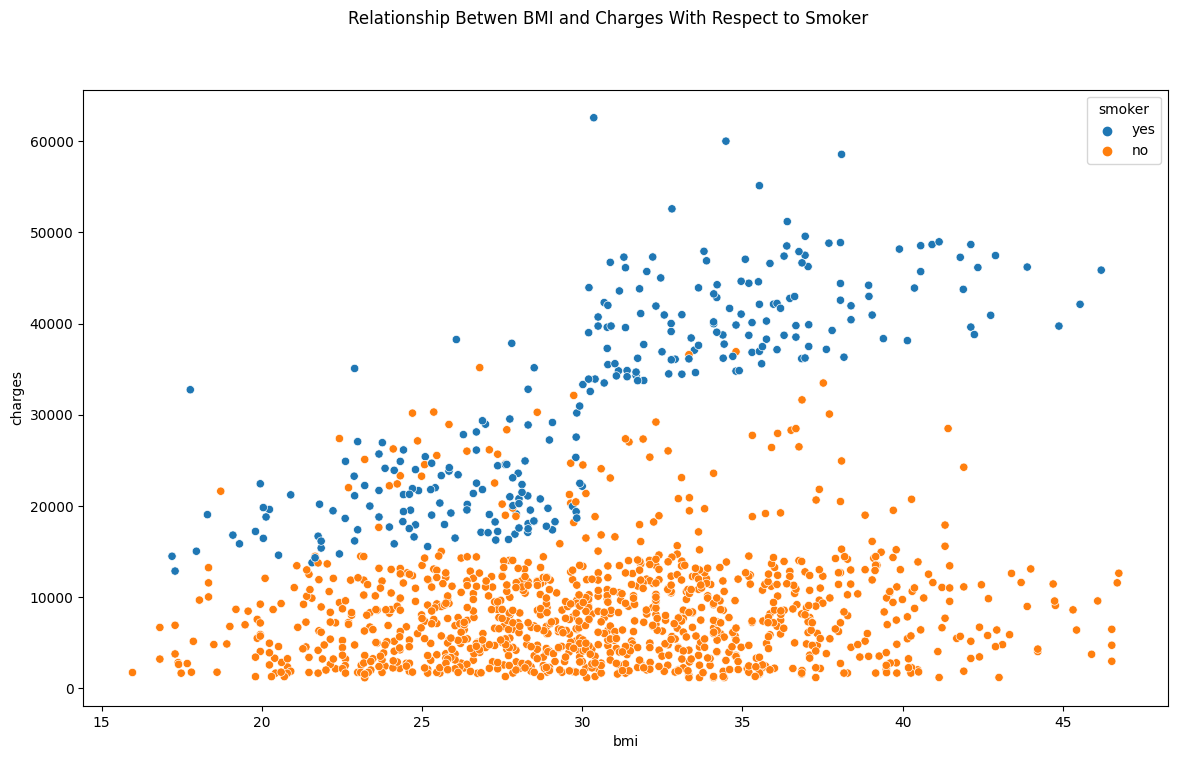

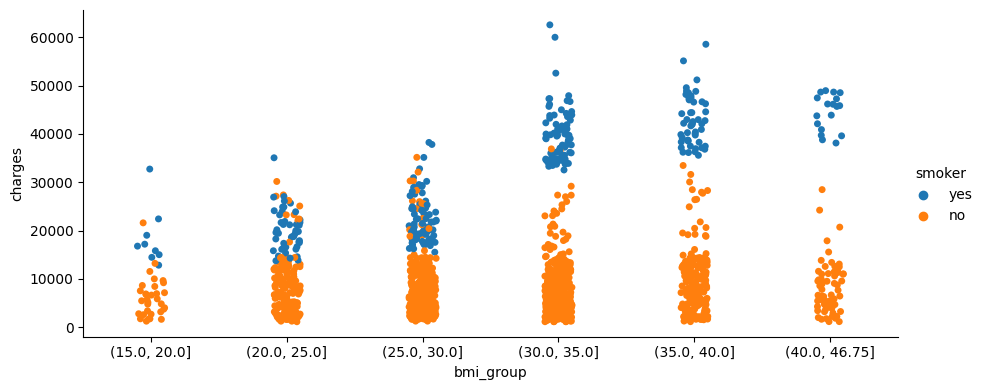

<Figure size 640x480 with 0 Axes>

In [121]:
bmi_bin = [15, 20, 25, 30, 35, 40, df['bmi'].max()]
df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bin)
fig5 = plt.figure(figsize = (14,8))
plt.suptitle('Relationship Betwen BMI and Charges With Respect to Smoker')

sns.scatterplot(x = 'bmi',y='charges',hue = 'smoker',data = df)

sns.catplot(data= df,x ='bmi_group',y='charges',hue = 'smoker',height = 4, aspect = 2.3)

plt.show()
plt.clf()

**BMI degerlerini rangelere ayirip baktiktan ve ayri ayri inceledikten sonra BMI degerlerinin ucretlendirmelerde cok buyuk bir etkisi olmasa da kucuk bir etkisinin oldugunu soyleyebiliriz. Asil fark eden bilesen yine oldugu gibi sigara faktorunun girmesidir. Fakat dikkat edilmesi gereken bir nokta BMI degerinin 30 dan sonraki degerler icin sigara opsiyonu fiyatlarda uc noktalara cikma egilimi gosteriyor denebilir.**

## **3.10 REGION, SMOKER VE BMI ARASINDAKI BAGLANTININ INCELENMESI**

Text(0, 0.5, 'BMI')

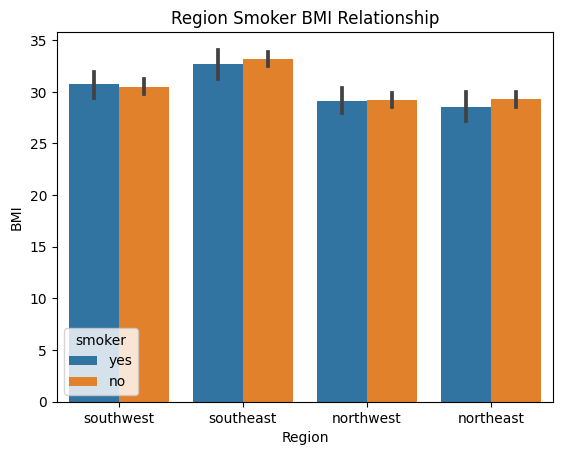

In [122]:
sns.barplot(x= 'region',y='bmi',hue = 'smoker',data =df)
plt.title('Region Smoker BMI Relationship')
plt.xlabel('Region')
plt.ylabel('BMI')

**Bolge bazinda en yuksek bmi degerleri southeast bolgesine ait olarak gozukuyor. Sigara faktorunun ise bmi degerlerine bir katkisi oldugunu soyleyemeyiz.**

# **4. DATA ISLENMESI TRAIN VE TEST TESTLERE AYRILMASI**

In [3]:
df = pd.read_csv('insurance.csv')
print(f'Smoker unique values :{df.smoker.unique()}')
print('-'*100)
print(f'Region unique values :{df.region.unique()}')
print('-'*100)
print(f'Sex unique values : {df.sex.unique()}')

Smoker unique values :['yes' 'no']
----------------------------------------------------------------------------------------------------
Region unique values :['southwest' 'southeast' 'northwest' 'northeast']
----------------------------------------------------------------------------------------------------
Sex unique values : ['female' 'male']


<ipython-input-4-1d1ce430d58e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True,fmt='.1f', linewidths=0.5,color = 'red')


<Axes: title={'center': 'Correlation Map Without Categorical Values'}>

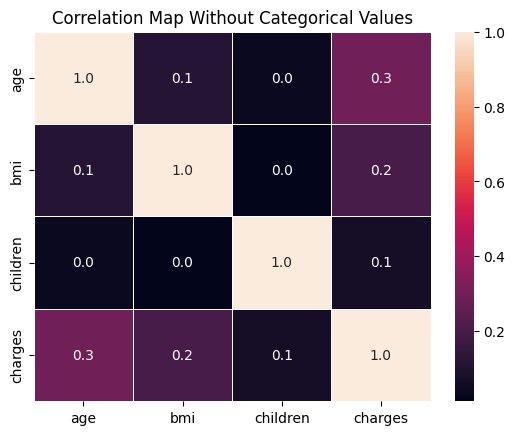

In [4]:
plt.title('Correlation Map Without Categorical Values')
sns.heatmap(df.corr(), annot= True,fmt='.1f', linewidths=0.5,color = 'red')

Dataya baktigimiz zaman belirli bir korelasyon goremiyoruz. Fakat bunun sebebi kategorik verileri dahil etmememiz olabilir. Bu yuzden 'Smoker' ve 'Sex' gibi degiskenleri 0-1 formatina cevirmek dogru bir yaklasim olacaktir. Gerektigi takdirde bolgeler de cevirilebilir.

In [117]:
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

Goruldugu uzere burada datalarimiz format degistirdi. Bunlar sirasiyla


*   Smoker = 1 = Sigara iciyor.
*   Smoker = 0 = Sigara icmiyor.

*   Sex = 1 = Erkek/Male
*   Sex = 0 = Kadin/Female


*   Region = 0 = Northeast
*   Region = 1 = Northwest
*   Region = 2 = Southeast
*   Region = 3 = Southwest

Bu degisikliklerle beraber aradaki iliskiyi gormek adina tekrardan bir correlation map duzenlemesi yapalim.




<Axes: title={'center': 'Correlation Map With Categorical Values'}>

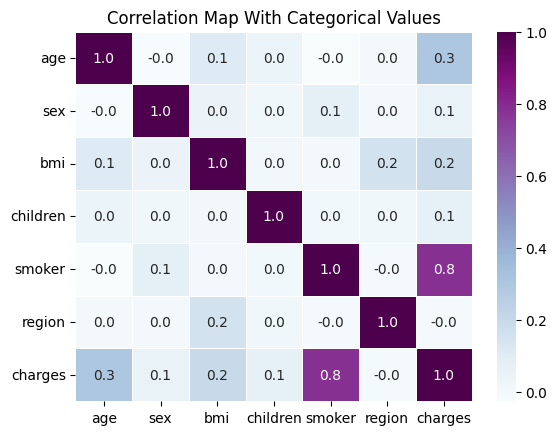

In [6]:
plt.title('Correlation Map With Categorical Values')
sns.heatmap(df.corr(), annot= True,fmt='.1f', linewidths=0.5,cmap="BuPu")

Correlation mapte de goruldugu gibi sigara icme durumu ve buna karsilik cikan ucret farki inanilmaz baglantili olarak gozukuyor.

# **5. MODEL SECIMI VE ISLENMESI**

### **Bu kisimda hazir kodlari da incelemekle beraber makine ogrenmesinin hangi formullere dayanarak ilerledigini degerlendirmek adina kendi modellerimi de kurmaya calistim bu baglamda bazi modellerin kendi algoritmalarimi yazdigim kisimlari ile kiyaslanmasi uzerine de gidecegim. Dolayisi ile tum modellerde hyper parametreler olmayabilir. Asil onemli olanin modellerin (en azindan basit olanlarin) nasil isledigini ogrenmek oldugunu dusunuyorum**

## **5.1 LINEAR REGRESSION KONU ANLATIMI VE KENDI IMPLEMENTASYONUM**

**Elimizde bir veri seti oldugunu dusunerek baslamak anlamak adina daha kolay olacaktir. Oncelikle bizim veri setimizden ziyade simdilik sadece bir degiskene dair bir veri seti oldugunu varsayalim. (Sadece buldugum resimde o sekilde gosterdigi icin o mantikta anlatmayi dogru buldum.) Yoksa istenen her turlu sekilde yapilabilir.Ki bizim verimize gore olan formulu ben yine de yazacagim.**

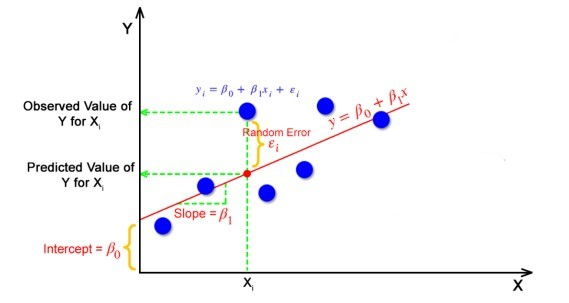

Burada basitce anlatilmak istenen aslinda formulazsyon olarak sudur.
B0 yani intercept degerimiz bir baslangic otelemesi olarak dusunulebilir. ve bunun beraberinde tahmini yapilacak y degerleri formulde bu sekilde olacaktir.

**Y_tahmin = B0 + B1*X**

Bu denklemde B0 in intercept oldugunu soyledik yukaridaki grafikten de rahatca gorulebiliyor. Bu tahmin yapilirken bilinmek istenen B1 degerinin katsayisi ve ona eslenik olarak gelen X girdisi olacaktir. B1 degeri bir coefficient olarak gecer cok dogru olmasa da suanlik hatta 'weight' bile olarak tanimlayabiliriz.


Gercek Y degerleri de aslinda formulumuzden pek de farkli degil. O da:

 **Y_gercek = B0 + B1*X + error** olarak tanimlanir. Peki bu Y_gercek degeri nasil bulunuyor yani islem olarak?

Elimizde gercek y degerleri oldugu icin aslinda soyle dusunebiliriz. Bilinen y ve x degerleri icin ornek olmasi icin birkac tane denklem uyduralim.

*   13 = B0 + B1*30 + error
*   145 = B0 + B1*120 + error
*   20 = B0 + B1*50 + error
*   521 = B0 + B1*600 + error

Simdi bu islemleri matrix formatinda yazarak tekrardan bir gorelim.

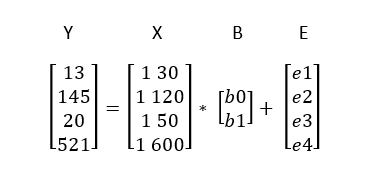

Matrix carpimlarini yazmak gerektiginde aslinda denklemin ayni oldugunu zaten gorebiliyoruz. X in basindaki 1 lerin yani interceptlerin nereden geldigi de bu sekilde cozulmus oluyor. Gozukmemesi veya net anlasilmasi icin yine de B*X kismini yazabiliriz en azindan.

*   b0 + 30 * b1
*   b0 + 120 * b1
*   b0 + 50 * b1
*   b0 + 600 * b1

Seklinde acildigini gorebiliriz. Burada dikkat edilmesi gereken diger bir konu da olusan XB matrisinin 4x1 seklinde bir matrix olacagidir.



Peki bu islemleri neden yapiyoruz ? Aslinda bu carpimi bulup denklemi bulmak cozumu bize vermiyor hemen. Asil istenen bu denklemleri X transpose ve X cinsinden yazabilmek. Asagidaki resimde gordugunuz uzere denklem sadelestirme yaparak aslinda istedigimiz tum degerlere ulasabildigimizi goreceksiniz.

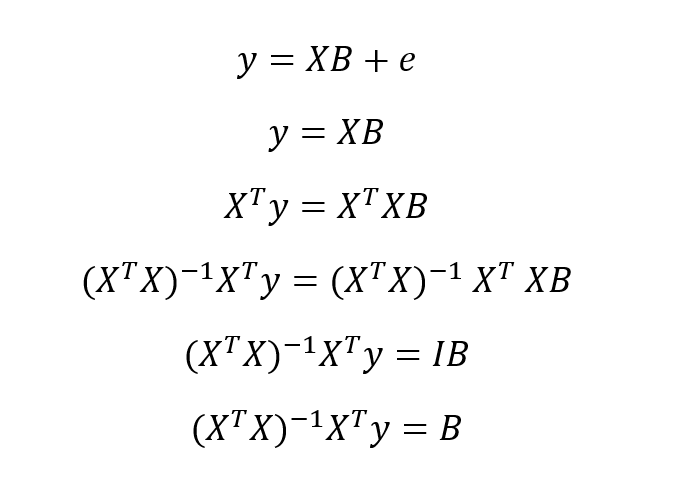

Tum islemler bu sekilde. Kisaca ozetleyecek olursak sadece girdiler ve ciktilar kullanilarak B degerlerine ait bilgileri bulabiliriz. Buldugumuz B degerleri aslinda linear cizginin denklem katsayilari olacak ve buna mutabik predictionlar yapabilecegiz.

Simdi kodda gerceklemesini yapip scikit kutuphanesi ile kiyaslayalim.

In [10]:
#MY LINEAR REGRESSION MODEL
X = df[['age','sex','bmi','children','smoker','region']].copy() #X girdileri yukarida anlatmis oldugumuz B1 B2 B3 parametreleri burada yer aliyor.
Y = df[['charges']].copy() # Gercek Y degerleri
X['intercept'] = 1 #Intercept X matrix carpiminda daha kolay gozukuyor.
X = X[['intercept','age','sex','bmi','children','smoker','region']] #Matrix carpimi yapabilmek icin interceptleri X in basina aktariyorum.
X_T = X.T # X degerlerinin transposunu aliyorum.
B = np.linalg.inv(X_T @ X) @ X_T @ Y # Yukaridaki denklemin aynisini kod olarak yaziyorum. @ isareti pythonda matrix carpimi kullaniliyor. Bu nokta onemli.
B.index = X.columns #Daha guzel bir goruntu icin index degerleri yerine column isimlerini yazdiriyorum.
predictions = X @ B #En son adimda denklemim hazir ve prediction yapabilirim.
display(B)
display(predictions)

,charges
intercept,-11815.452321
age,257.288075
sex,-131.110580
bmi,332.570132
children,479.369394
smoker,23820.434123
region,-353.640017


,charges
0,25111.241864
1,3687.605173
2,6963.145707
3,3741.308405
4,5537.640897
...,...
1333,12302.006002
1334,3431.371647
1335,4363.662366
1336,1106.986613


B katsayilarimi ve buna bagli olarak predictionlari yaptik. Simdi modeli test etmek amacli R2 degerlerine bakalim. Bunlari da elle bulmak istedigimden dolayi bu degerlerin nerelerden geldigini anlatan kucuk bir yazi ve sonrasinda kod olarak devam etmeyi dogru buldum. Umarim Omer hocam okurken cok sıkılmazsınız :D

SSR diye tanimladigimiz degerler aslinda SUM SQUARED RESIDUALS olarak tanimlaniyor gercek ve tahmini y degerlerinin farkinin kareleerinin toplami olarak nitelendiriliyor.

SST ise SUM OF SQUARED TOTALS olarak geciyor ve mean degerleri arasindaki farklarin kare toplamina esit oluyor. Bu deger normalde verinin dagilimi hakkinda bilgi sahibi olmamizi sagliyor.

R2 erroru bulmak icin de SSR VE SST oranindan 1 i cikarmamiz gerekiyor. Aslinda variance ne kadar yuksek olursa olsun error olmadigi surece 100 de 100 oranla calisma ihtimali var. Tabii ki bu hatasiz model demek

In [11]:
SSR = ((Y-predictions)**2).sum()
SST = ((Y- Y.mean())**2).sum()
R2 = 1 - (SSR/SST)
print(SSR)
print(SST)
print(R2[0])
print(B)

charges    4.887401e+10
dtype: float64
charges    1.960742e+11
dtype: float64
0.7507372027994939
                charges
intercept -11815.452321
age          257.288075
sex         -131.110580
bmi          332.570132
children     479.369394
smoker     23820.434123
region      -353.640017


Kendi modelimiz bitti. Simdi bunu toparlayip tek bir fonksiyon haline getirelim ve SCIKIT linear regression modeli ile kiyaslayalim.

In [7]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

In [192]:
def my_linear_regression():
  X = df[['age','sex','bmi','children','smoker','region']].copy()
  Y = df[['charges']].copy()
  X['intercept'] = 1
  X = X[['intercept','age','sex','bmi','children','smoker','region']]
  X_T = X.T
  B = np.linalg.inv(X_T @ X) @ X_T @ Y
  B.index = X.columns
  predictions = X @ B
  SSR = ((Y-predictions)**2).sum()
  SST = ((Y- Y.mean())**2).sum()
  R2 = 1 - (SSR/SST)
  return B,R2[0]
B,my_linear_regression_r2 = my_linear_regression()
my_linear_regression_r2

0.7507372027994939

In [201]:
# #SCIKIT LINEAR REGRESSION
def linear_regression(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

  lr=LinearRegression(fit_intercept=True,copy_X=True, n_jobs=None)
  lr.fit(X_train,y_train)

  # print("Score the X-train with Y-train is : ", lr.score(X_train,y_train))
  # print("Score the X-test  with Y-test  is : ", lr.score(X_test,y_test))
  y_pred_LR=lr.predict(X_test)
  # print(lr.intercept_)
  # print(lr.coef_)

  return r2_score(y_test,y_pred_LR)

linear_reg_r2 = linear_regression(X,y)
print(linear_reg_r2)

0.7602344599010098


Scikit linear regression algoritmasi ve kendi algoritmamizi kiyaslarsak sirasiyla

                      MY LINEAR REGRESSION       SCIKIT LEARN LINEAR REGRESSION
intercepts  

                         -11815.452321                -12117.14921418
coeffs
               
                          257.288075                    259.870936
                         -131.110580                    48.14518497
                          332.570132                    337.05864381
                          479.369394                    427.52339986
                          23820.434123                  23622.50371905
                         -353.640017                   -299.04523816

r2 score

                          0.7507372027994939           0.7668905583460908
    
    
    

## **5.2 RIDGE REGRESSION VE KENDI RIDGE REGRESSION IMPLEMENTASYONUM**

Konuyu basitce linear regression icin anlattiktan sonra tekrardan aciklama metinleri yazmak cok istesem de proje icin cok fazla vakit ayiramadim ve dolayisi ile kendi implementasyonumu sadece kod icerisinde comment satirlariyla devam etmeyi dogru buldum. Bu kendi implemente etmeyi ogrendigim ikinci model ve baska bir model olmayacak. Dolayisi ile diger modellerin devaminda modelleri implemente edip devam edecegiz.

In [156]:
df = pd.read_csv('insurance.csv')
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)
train,test = train_test_split(df,test_size = 0.2, random_state = 1)
predictors = ['age','sex','bmi','children','smoker','region']
target = 'charges'

In [157]:
X = train[predictors].copy()
y = train[[target]].copy()
display(X)
display(y)

,age,sex,bmi,children,smoker,region
216,53,0,26.600,0,0,1
731,53,1,21.400,1,0,3
866,18,1,37.290,0,0,2
202,60,0,24.035,0,0,1
820,45,1,33.700,1,0,3
...,...,...,...,...,...,...
715,60,1,28.900,0,0,3
905,26,0,29.355,2,0,0
1096,51,0,34.960,2,1,0
235,40,0,22.220,2,1,2


,charges
216,10355.64100
731,10065.41300
866,1141.44510
202,13012.20865
820,7445.91800
...,...
715,12146.97100
905,4564.19145
1096,44641.19740
235,19444.26580


In [158]:
x_mean = X.mean()
x_std = X.std()
x_mean

age         39.004673
sex          0.509346
bmi         30.670126
children     1.095327
smoker       0.205607
region       1.514953
dtype: float64

In [159]:
X['intercept'] = 1
X = X[['intercept']+predictors]
X

,intercept,age,sex,bmi,children,smoker,region
216,1,53,0,26.600,0,0,1
731,1,53,1,21.400,1,0,3
866,1,18,1,37.290,0,0,2
202,1,60,0,24.035,0,0,1
820,1,45,1,33.700,1,0,3
...,...,...,...,...,...,...,...
715,1,60,1,28.900,0,0,3
905,1,26,0,29.355,2,0,0
1096,1,51,0,34.960,2,1,0
235,1,40,0,22.220,2,1,2


In [160]:
X.T

,216,731,866,202,820,986,776,288,8,241,...,749,129,144,960,847,715,905,1096,235,1061
intercept,1.0,1.0,1.00,1.000,1.0,1.000,1.0,1.000,1.00,1.000,...,1.000,1.0,1.00,1.000,1.00,1.0,1.000,1.00,1.00,1.00
age,53.0,53.0,18.00,60.000,45.0,43.000,40.0,59.000,37.00,33.000,...,28.000,38.0,30.00,19.000,23.00,60.0,26.000,51.00,40.00,57.00
sex,0.0,1.0,1.00,0.000,1.0,1.000,1.0,0.000,1.00,0.000,...,1.000,1.0,1.00,0.000,1.00,1.0,0.000,0.00,0.00,1.00
bmi,26.6,21.4,37.29,24.035,33.7,30.115,32.3,36.765,29.83,22.135,...,30.875,34.7,28.69,39.615,50.38,28.9,29.355,34.96,22.22,27.94
children,0.0,1.0,0.00,0.000,1.0,3.000,2.0,1.000,2.00,1.000,...,0.000,2.0,3.00,1.000,1.00,0.0,2.000,2.00,2.00,1.00
smoker,0.0,0.0,0.00,0.000,0.0,0.000,0.0,1.000,0.00,0.000,...,0.000,0.0,1.00,0.000,0.00,0.0,0.000,1.00,1.00,0.00
region,1.0,3.0,2.00,1.000,3.0,1.000,1.0,0.000,0.00,0.000,...,1.000,3.0,1.00,1.000,2.00,3.0,0.000,0.00,2.00,2.00


In [161]:
alpha = 2
I = np.identity(X.shape[1])
I[0][0] = 0
I

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [162]:
penalty = alpha * I

In [164]:
B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
B.index = X.columns
B

,charges
intercept,-11152.848935
age,257.884569
sex,-226.275256
bmi,314.960055
children,409.818563
smoker,23496.218956
region,-330.167734


In [175]:
  df = pd.read_csv('insurance.csv')
  #sex
  le = LabelEncoder()
  le.fit(df.sex.drop_duplicates())
  df.sex = le.transform(df.sex)
  # smoker or not
  le.fit(df.smoker.drop_duplicates())
  df.smoker = le.transform(df.smoker)
  #region
  le.fit(df.region.drop_duplicates())
  df.region = le.transform(df.region)


  train,test = train_test_split(df,test_size = 0.2, random_state = 1)
  predictors = ['age','sex','bmi','children','smoker','region']
  target = 'charges'

In [177]:
#RIDGE REGRESSION IMPLEMENTATION
def my_ridge_regression():
  X = train[predictors].copy()
  y = train[[target]].copy()
  x_mean = X.mean()
  x_std = X.std()
  X['intercept'] = 1
  X = X[['intercept']+predictors]
  alpha = 2
  I = np.identity(X.shape[1])
  I[0][0] = 0
  B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
  B.index = X.columns
  test_X = test[predictors]
  test_X = (test_X - x_mean) / x_std
  test_X["intercept"] = 1
  test_X = test_X[["intercept",'age','sex','bmi','children','smoker','region']]
  predictions = test_X @ B
  return B,predictions
B,predictions = my_ridge_regression()

In [181]:
#SCIKIT RIDGE REGRESSION
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = alpha)
ridge.fit(X[predictors],y)
print(ridge.intercept_)
print(ridge.coef_)
sklearn_predictions = ridge.predict(test_X[predictors])
predictions - sklearn_predictions

[-11152.84893522]
[[  257.88456882  -226.27525615   314.96005507   409.81856317
  23496.21895641  -330.16773379]]


,charges
559,-2.910383e-11
1087,-2.910383e-11
1020,-4.001777e-11
460,-1.818989e-11
802,-4.365575e-11
...,...
682,-7.275958e-12
629,7.275958e-12
893,-7.275958e-12
807,-2.182787e-11


## **Diger algoritmalar icin bir anlatim veya islemsel bir dagilim yapmayacagim icin bundan sonraki algoritmalar isimleri verilerek for dongusu icerisinde r2 skorlari incelenerek ele alinacaktir.**

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('insurance.csv')
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)


X = df.drop(['charges'], axis = 1)
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **5.3 Random Forest**


In [198]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf = RandomForestRegressor(max_depth = 5, n_estimators=600)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
random_forest_r2 = r2_score(y_test,y_pred)
random_forest_train_score = rf.score(X_train,y_train)

print(random_forest_train_score)
print(random_forest_r2)

0.8941363370820121
0.8517948267272966


## **5.4 Decision Tree**


In [199]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

decision_tree_r2 = r2_score(y_test,y_pred)
decision_tree_train_score = dt.score(X_train,y_train)
print(decision_tree_train_score)
print(decision_tree_r2)

0.8590519773830172
0.8351806701180056


## **5.5 XG BOOST**


In [200]:
import xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.1)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


xgboost_r2 = r2_score(y_test,y_pred)
xgboost_train_score = xgb.score(X_train,y_train)
print(xgboost_r2)
print(xgboost_train_score)

0.8536748931986873
0.8864525846913403


# **SONUC**

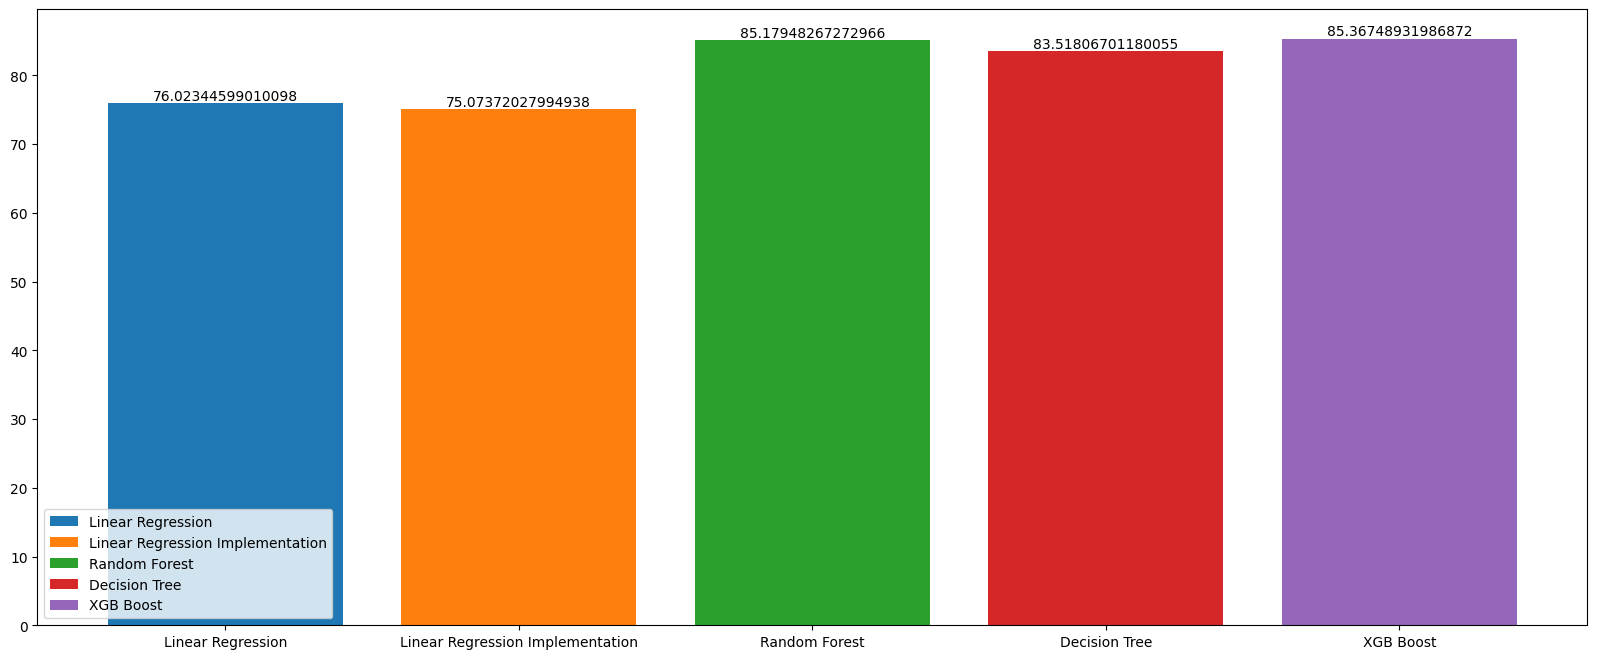

In [236]:
r2_scores = [linear_reg_r2,my_linear_regression_r2,random_forest_r2,decision_tree_r2,xgboost_r2]
r2_scores_100 = [x*100 for x in r2_scores]
labels = ['Linear Regression','Linear Regression Implementation','Random Forest','Decision Tree','XGB Boost']
indexes = [0,1,2,3,4]

for r2,label,index in zip(r2_scores_100,labels,indexes):
  plt.bar(label,r2)
  plt.text(index, r2, str(r2), ha='center', va='bottom')

plt.legend(['Linear Regression','Linear Regression Implementation','Random Forest','Decision Tree','XGB Boost'],loc = 3)

Modeller incelendiginde en etkili modellerin XGB ve Random Forest oldugunu gorebiliyoruz. Linear Regression gibi basit modellerin cok yeterli calismaamsindaki en buyuk etmen bu modellerin linear veya oranli bir artis durumlarinda tepki vermeleri olarak yorumlayabiliriz.